In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Conhecendo o dataset

In [2]:
dados = pd.read_csv('Consumo_cerveja.csv', sep=';')
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [3]:
dados.shape

(365, 7)

In [4]:
dados.consumo.describe()

count      365.000000
mean     25401.367123
std       4399.142703
min      14343.000000
25%      22008.000000
50%      24867.000000
75%      28631.000000
max      37937.000000
Name: consumo, dtype: float64

In [5]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [6]:
dados.corr().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.00,0.86,0.92,0.02,-0.05,0.57
temp_min,0.86,1.00,0.67,0.10,-0.06,0.39
temp_max,0.92,0.67,1.00,-0.05,-0.04,0.64
chuva,0.02,0.10,-0.05,1.00,0.00,-0.19
fds,-0.05,-0.06,-0.04,0.00,1.00,0.51
consumo,0.57,0.39,0.64,-0.19,0.51,1.00


##Análise gráficas

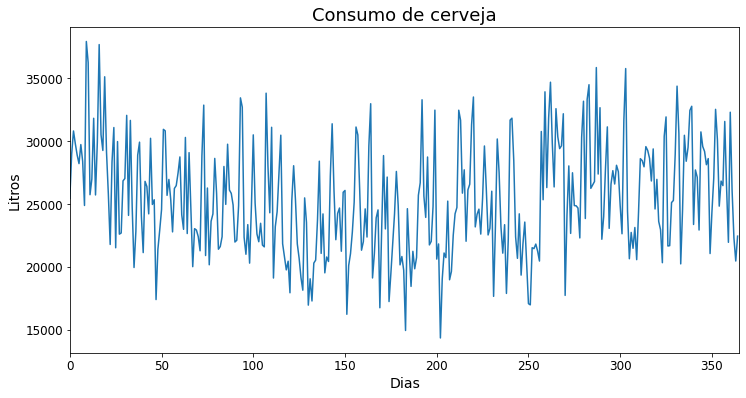

In [7]:
fig, ax = plt.subplots(figsize = (12,6))


ax = dados['consumo'].plot(fontsize = 12, xlim=(0, 365))
ax.set_title('Consumo de cerveja', fontsize = 18)
ax.set_xlabel('Dias', fontsize=14)
ax.set_ylabel('Litros', fontsize=14)
ax

In [8]:
import seaborn as sns 

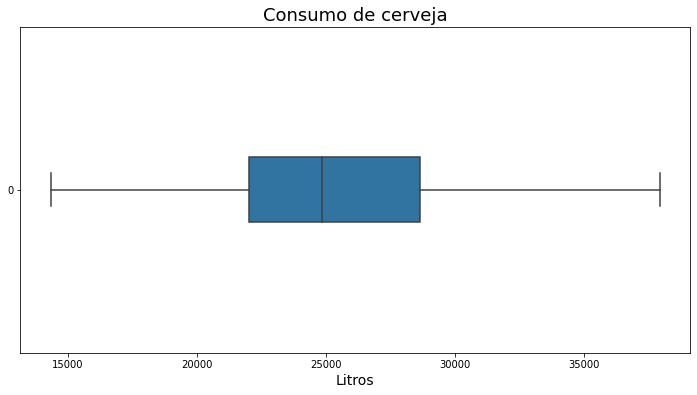

In [9]:
ax = sns.boxplot(data = dados['consumo'], orient='h', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de cerveja', fontsize = 18)
ax.set_xlabel('Litros', fontsize=14)
ax

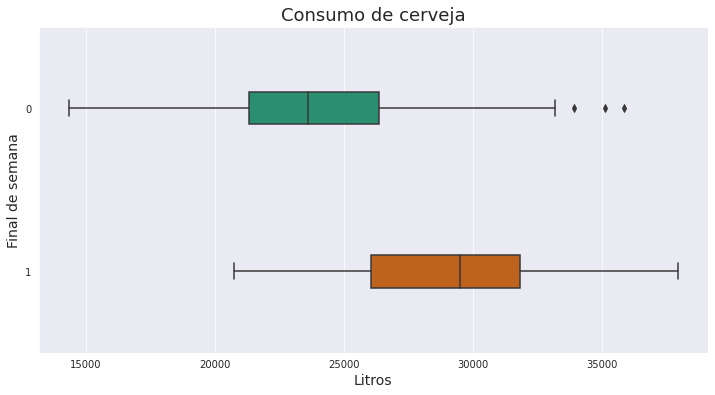

In [10]:
sns.set_palette('Dark2')
sns.set_style('darkgrid')
ax = sns.boxplot(data = dados, x = 'consumo', y = 'fds', orient='h', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de cerveja', fontsize = 18)
ax.set_xlabel('Litros', fontsize=14)
ax.set_ylabel('Final de semana', fontsize=14)
ax

Regressões lineares assumem que as variáveis dependentes (ys) seguem uma distribuição normal.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


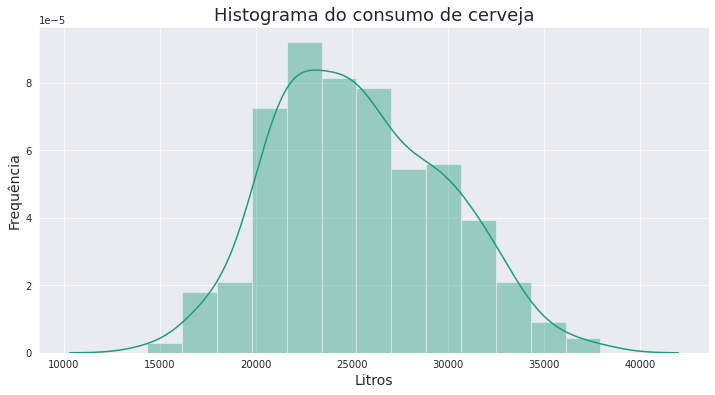

In [11]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma do consumo de cerveja', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax.set_ylabel('Frequência', fontsize=14)
ax

##pairplot

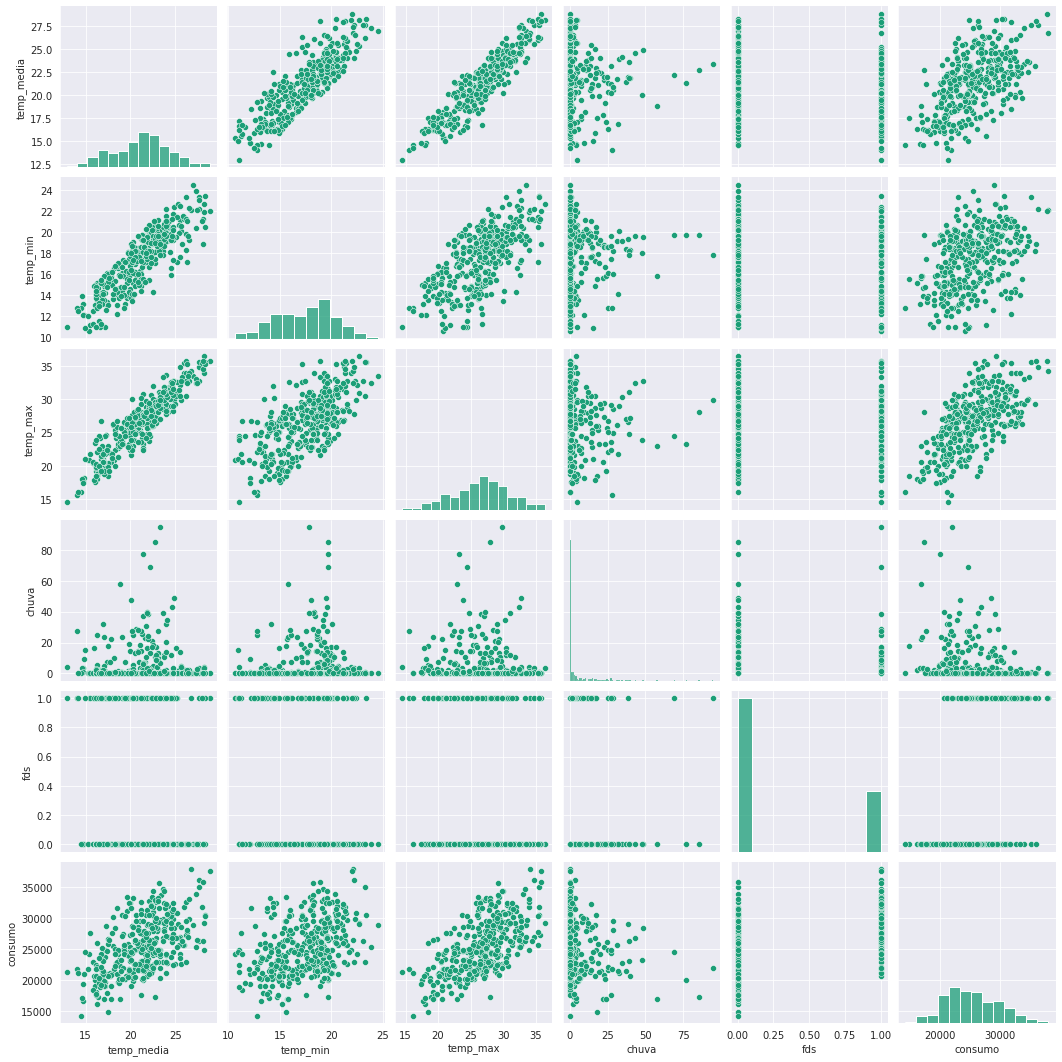

In [12]:
ax = sns.pairplot(dados)

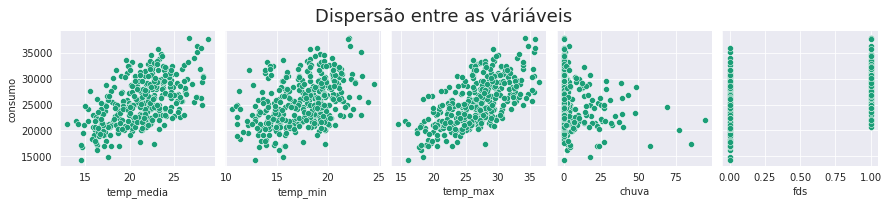

In [13]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_media',	'temp_min',	'temp_max',	'chuva', 'fds'])
ax.fig.suptitle('Dispersão entre as váriáveis', fontsize=18, y=1.1)
ax

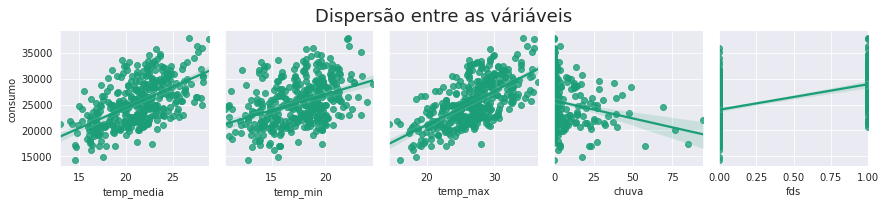

In [14]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_media',	'temp_min',	'temp_max',	'chuva', 'fds'], kind='reg')
ax.fig.suptitle('Dispersão entre as váriáveis', fontsize=18, y=1.1)
ax

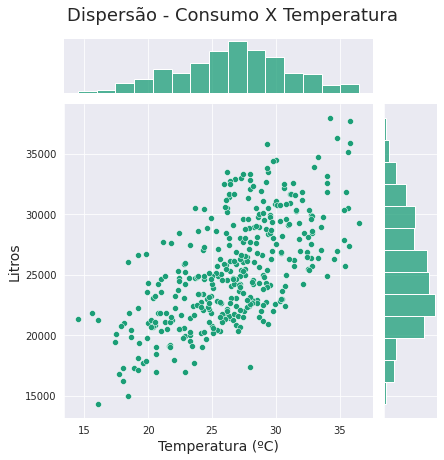

In [15]:
ax = sns.jointplot(data=dados, x='temp_max', y='consumo')
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels('Temperatura (ºC)','Litros', fontsize=14)
ax

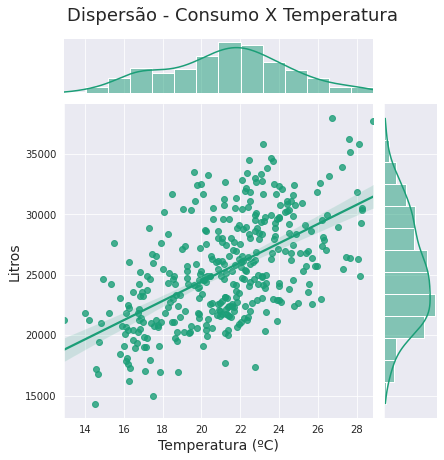

In [16]:
ax = sns.jointplot(data=dados, x='temp_media', y='consumo', kind='reg')
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels('Temperatura (ºC)','Litros', fontsize=14)
ax

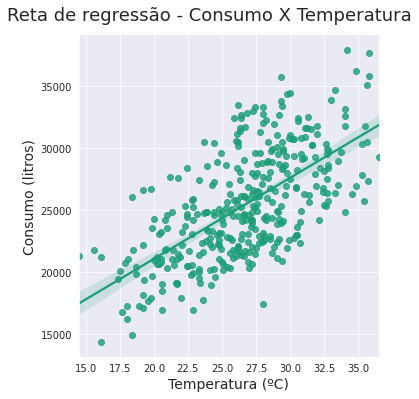

In [17]:
ax = sns.lmplot(data = dados, x = 'temp_max', y = 'consumo')
ax.fig.suptitle('Reta de regressão - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_xlabels('Temperatura (ºC)', fontsize=14)
ax.set_ylabels('Consumo (litros)', fontsize=14)
ax

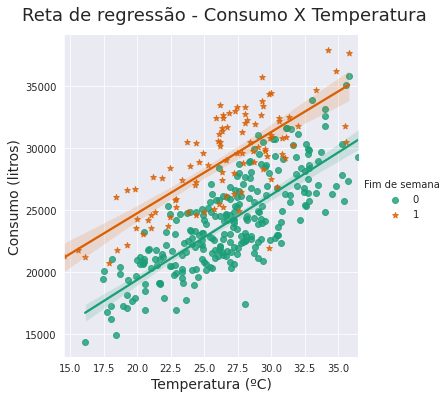

In [18]:
ax = sns.lmplot(data = dados, x = 'temp_max', y = 'consumo', hue='fds', markers=['o', '*'], legend=False)
ax.fig.suptitle('Reta de regressão - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_xlabels('Temperatura (ºC)', fontsize=14)
ax.set_ylabels('Consumo (litros)', fontsize=14)
ax.add_legend(title='Fim de semana')
ax

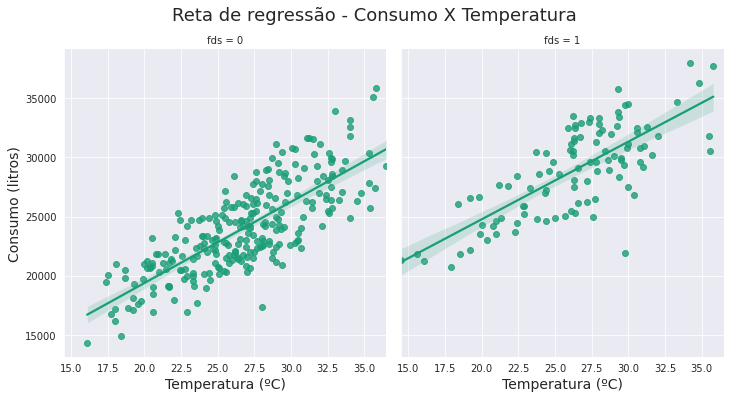

In [19]:
ax = sns.lmplot(data = dados, x = 'temp_max', y = 'consumo', col='fds')
ax.fig.suptitle('Reta de regressão - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_xlabels('Temperatura (ºC)', fontsize=14)
ax.set_ylabels('Consumo (litros)', fontsize=14)
ax

##Divisão em treinamento e Test

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
y = dados['consumo']
X = dados[['temp_max', 'chuva', 'fds']] 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [23]:
X_train.shape

(255, 3)

In [24]:
y_train.shape

(255,)

In [25]:
X_test.shape

(110, 3)

In [26]:
y_test.shape

(110,)

##Treinamento da regressão

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [54]:
modelo = LinearRegression()

In [55]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
print(f'R²={modelo.score(X_train, y_train):.2f}')

R²=0.73


In [31]:
y_pred = modelo.predict(X_test)

In [32]:
print(f'R²={metrics.r2_score(y_test, y_pred):.2f}')

R²=0.69


##Executando previsões

In [33]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


In [34]:
modelo.predict(entrada)[0]

26094.901775262017

In [35]:
y_test[0:1]

5    28218
Name: consumo, dtype: int64

In [36]:
temp_max = 0
chuva = 0
fds=50
entrada =[[temp_max, chuva, fds]]

In [37]:
modelo.predict(entrada)[0]

276006.1432724311

##Componentes das regressões

In [38]:
modelo.intercept_

5951.976339312445

In [39]:
type(modelo.intercept_)

numpy.float64

In [40]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [41]:
type(modelo.coef_)

numpy.ndarray

In [42]:
index = ['Intercepto', 'Tempe', 'Chuva', 'fds']
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Tempe,684.736759
Chuva,-60.782435
fds,5401.083339


##Analise gráfica das previsões

In [43]:
y_pred_train = modelo.predict(X_train)

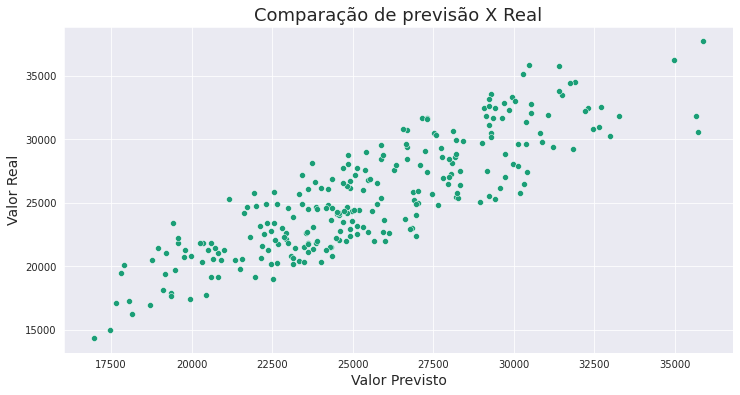

In [44]:
ax = sns.scatterplot(x=y_pred_train, y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Comparação de previsão X Real', fontsize=18)
ax.set_xlabel('Valor Previsto', fontsize=14)
ax.set_ylabel('Valor Real', fontsize=14)
ax

In [45]:
residuo = y_train - y_pred_train

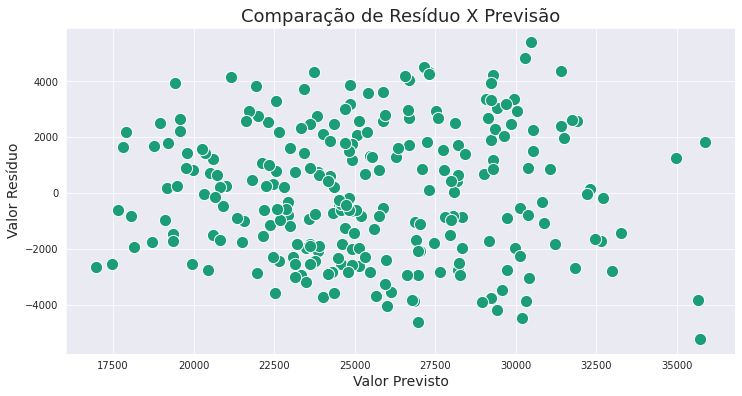

In [46]:
ax = sns.scatterplot(x=y_pred_train, y=residuo, s=150)
ax.figure.set_size_inches(12,6)
ax.set_title('Comparação de Resíduo X Previsão', fontsize=18)
ax.set_xlabel('Valor Previsto', fontsize=14)
ax.set_ylabel('Valor Resíduo', fontsize=14)
ax

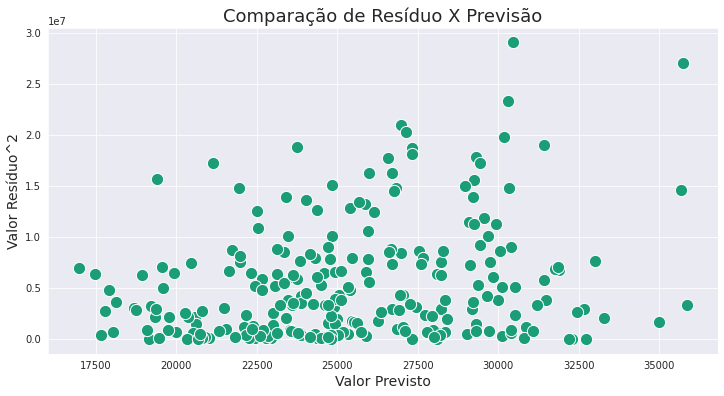

In [47]:
ax = sns.scatterplot(x=y_pred_train, y=residuo**2, s=150)
ax.figure.set_size_inches(12,6)
ax.set_title('Comparação de Resíduo X Previsão', fontsize=18)
ax.set_xlabel('Valor Previsto', fontsize=14)
ax.set_ylabel('Valor Resíduo^2', fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


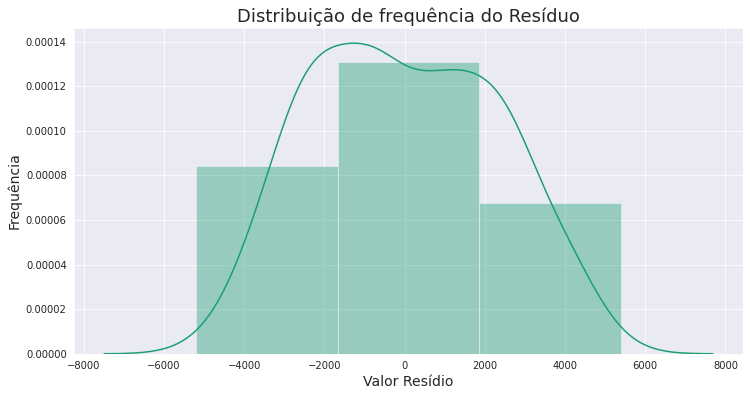

In [48]:
ax = sns.distplot(residuo, bins=3)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequência do Resíduo', fontsize=18)
ax.set_xlabel('Valor Resídio', fontsize=14)
ax.set_ylabel('Frequência', fontsize=14)
ax

##Novos modelos

In [51]:
y2 = dados['consumo']
X2 = dados[['temp_media', 'chuva', 'fds']] 

In [52]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=2811)

In [56]:
modelo2 = LinearRegression()
modelo2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
print(f'R²={modelo2.score(X2_train, y2_train):.2f}')

R²=0.66


In [61]:
y2_pred = modelo2.predict(X2_test)

In [62]:
print(f'R²={metrics.r2_score(y2_test, y2_pred):.2f}')

R²=0.66


##Metricas de avaliação

In [69]:
r2_2 = metrics.r2_score(y2_test, y2_pred).round(2)
r2_2

0.66

In [64]:
mqe2 =  metrics.mean_squared_error(y2_test, y2_pred).round(2)
mqe2

6060775.46

In [65]:
rmqe2 =  np.sqrt(metrics.mean_squared_error(y2_test, y2_pred).round(2))
rmqe2

2461.864224525796

In [70]:
r2 = metrics.r2_score(y_test, y_pred).round(2)
r2

0.69

In [66]:
mqe =  metrics.mean_squared_error(y_test, y_pred).round(2)
mqe

5471976.38

In [67]:
rmqe =  np.sqrt(metrics.mean_squared_error(y_test, y_pred).round(2))
rmqe

2339.225594080229

In [84]:
pd.DataFrame(([r2_2, mqe2, rmqe2,]), ['R²', 'SME', 'RMSE'], columns=['Metricas']).round(2)

,Metricas
R²,0.66
SME,6060775.46
RMSE,2461.86


In [89]:
np.array([[r2_2, mqe2, rmqe2,], [r2, mqe, rmqe]])

array([[6.60000000e-01, 6.06077546e+06, 2.46186422e+03],
       [6.90000000e-01, 5.47197638e+06, 2.33922559e+03]])

In [94]:
    pd.DataFrame(np.array([[r2, mqe, rmqe,], [r2_2, mqe2, rmqe2]]), index=['Modelo 1', 'Modelo 2'], columns=['R²', 'SME', 'RSME']).round(2)

,R²,SME,RSME
Modelo 1,0.69,5471976.38,2339.23
Modelo 2,0.66,6060775.46,2461.86


##Salvando modelo treinado

In [95]:
import pickle

In [96]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()

##importando modelo treinado

In [97]:
modelo_treinado = open('modelo_consumo_cerveja', 'rb')

In [98]:
lm_new = pickle.load(modelo_treinado)
modelo_treinado.close()

In [118]:
temp_max = 36
chuva = 0
fds=0
entrada =[[temp_max, chuva, fds]]

In [119]:
lm_new.predict(entrada)[0]

30602.49966274278